# 实验——回归

## Step1 任务分析

### question：丰田卡罗拉价格回归分析（数据集为ToyotaCorolla.csv）。
* Age: 车龄
* KM: 累计里程
* FuelType: 燃油类型 (Petrol, Diesel, CNG)
* HP: 功率
* MetColor: 是否金属漆 (Yes=1, No=0)
* Automatic: 是否自动挡( (Yes=1, No=0)
* CC: 排量
* Doors: 车门数量
* Weight: 整车重量
* Price: 售价（欧元）

## Step2 数据预处理

In [1]:
#Step1 查看数据集
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
#读取data
data = pd.read_csv('ToyotaCorolla.csv')
#显示所有特征列
pd.set_option('display.max_columns',None)
#显示前后3行训练集所有data
data.head(3).append(data.tail(3))

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23,46986,Diesel,90,1,0,2000,3,1165
1,13750,23,72937,Diesel,90,1,0,2000,3,1165
2,13950,24,41711,Diesel,90,1,0,2000,3,1165
1433,8500,71,17016,Petrol,86,0,0,1300,3,1015
1434,7250,70,16916,Petrol,86,1,0,1300,3,1015
1435,6950,76,1,Petrol,110,0,0,1600,5,1114


In [3]:
#查看数据维度
print('data shape:',data.shape)
print('-------------------------------------')
#查看数据类型
print(data.info())

data shape: (1436, 10)
-------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
Price        1436 non-null int64
Age          1436 non-null int64
KM           1436 non-null int64
FuelType     1436 non-null object
HP           1436 non-null int64
MetColor     1436 non-null int64
Automatic    1436 non-null int64
CC           1436 non-null int64
Doors        1436 non-null int64
Weight       1436 non-null int64
dtypes: int64(9), object(1)
memory usage: 112.3+ KB
None


In [4]:
#统计学角度观察数据
data.describe()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.674791,0.055710,1566.827994,4.033426,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.468616,0.229441,187.182436,0.952677,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,0.000000,1300.000000,2.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,0.000000,1400.000000,3.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1.000000,0.000000,1600.000000,4.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1.000000,0.000000,1600.000000,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,1.000000,2000.000000,5.000000,1615.00000


In [5]:
#查看FuelType列特征分布
data['FuelType'].value_counts()

Petrol    1264
Diesel     155
CNG         17
Name: FuelType, dtype: int64

In [6]:
data['CC'].value_counts()

1600    846
1300    248
1400    164
2000    119
1900     30
1800     14
1598      4
1587      4
1995      2
1398      2
1332      2
1975      1
Name: CC, dtype: int64

In [7]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


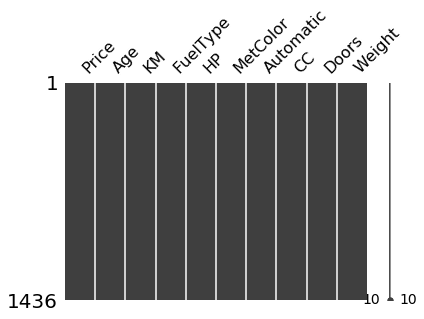

In [8]:
import missingno as msno
#可视化查看缺省值
msno.matrix(data,figsize=(6,4))

* 由上图可得出该数据集没有缺失值、空值、异常值。

## Step3 特征工程

In [9]:
data.head(3)

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23,46986,Diesel,90,1,0,2000,3,1165
1,13750,23,72937,Diesel,90,1,0,2000,3,1165
2,13950,24,41711,Diesel,90,1,0,2000,3,1165


* 浏览特征发现，FuelType列数据类型为string
* 使用pandas自带的get_dummies方法，实现将FuelType进行OneHot编码

In [10]:
fueltype = pd.get_dummies(data['FuelType'])
fueltype.head(3)

,CNG,Diesel,Petrol
0,0,1,0
1,0,1,0
2,0,1,0


In [11]:
data.shape

(1436, 10)

In [12]:
#合并fueltype特征列，删去原FuelType列
data_new = pd.concat([data,fueltype],axis=1,sort=False).drop(['FuelType'],axis=1)
data_new.head(3)

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,CNG,Diesel,Petrol
0,13500,23,46986,90,1,0,2000,3,1165,0,1,0
1,13750,23,72937,90,1,0,2000,3,1165,0,1,0
2,13950,24,41711,90,1,0,2000,3,1165,0,1,0


In [13]:
data_new.shape

(1436, 12)

In [14]:
from sklearn.preprocessing import StandardScaler

# zscore标准化
char_data = StandardScaler().fit_transform(data_new)
char_data = pd.DataFrame(char_data,index=data_new.index,columns=data_new.columns)

char_data

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,CNG,Diesel,Petrol
0,0.763763,-1.771966,-0.574695,-0.768042,0.694219,-0.242893,2.314976,-1.085139,1.758561,-0.109454,2.874807,-2.710874
1,0.832715,-1.771966,0.117454,-0.768042,0.694219,-0.242893,2.314976,-1.085139,1.758561,-0.109454,2.874807,-2.710874
2,0.887877,-1.718184,-0.715386,-0.768042,0.694219,-0.242893,2.314976,-1.085139,1.758561,-0.109454,2.874807,-2.710874
3,1.163685,-1.610620,-0.547650,-0.768042,-1.440467,-0.242893,2.314976,-1.085139,1.758561,-0.109454,2.874807,-2.710874
4,0.832715,-1.395491,-0.801028,-0.768042,-1.440467,-0.242893,2.314976,-1.085139,1.853577,-0.109454,2.874807,-2.710874
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,-0.891089,0.702015,-1.279939,-1.035138,0.694219,-0.242893,-1.425994,-1.085139,-0.901883,-0.109454,-0.347849,0.368885
1432,0.031491,0.863362,-1.321120,-1.035138,-1.440467,-0.242893,-1.425994,-1.085139,-1.091915,-0.109454,-0.347849,0.368885
1433,-0.615281,0.809579,-1.374036,-1.035138,-1.440467,-0.242893,-1.425994,-1.085139,-1.091915,-0.109454,-0.347849,0.368885
1434,-0.960042,0.755797,-1.376703,-1.035138,0.694219,-0.242893,-1.425994,-1.085139,-1.091915,-0.109454,-0.347849,0.368885


## Step4 建模调参

### 简单线性回归

--------------Simple Linear Regression---------------
常数项为：[-0.00722057]
各项系数为：[[-0.63271491 -0.17076344  0.26760273  0.01383079  0.02530776 -0.20810716
  -0.00174854  0.26108854 -0.07231661  0.11490981 -0.08572567]]
--------------训练集评价指标-----------------
R2: 0.8633885290423879
MSE: 0.1368118107935089
RMSE: 0.3698808061977654
--------------测试集评价指标-----------------
R2: 0.883596426487455
MSE: 0.11588371805797146
RMSE: 0.34041697674759325


Text(0.5, 1.0, 'simple linear regression')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


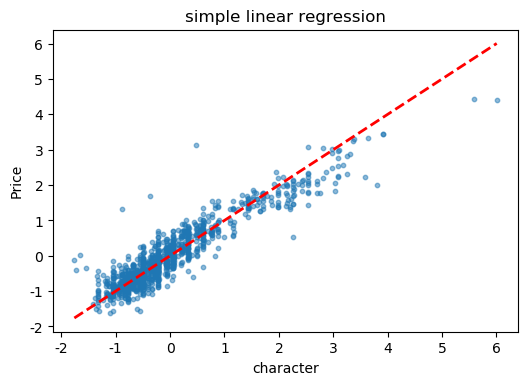

In [15]:
print("--------------Simple Linear Regression---------------")
from sklearn import linear_model
from sklearn.metrics import r2_score#R square
from sklearn import metrics

#解决图片无法正常显示的问题
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

#数据处理
X = char_data.drop(['Price'],axis=1)
y = char_data[['Price']]

#划分训练集和测试集
from sklearn.model_selection import train_test_split,cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

#求解线性模型参数
from sklearn.linear_model import LinearRegression
sim_lin_reg_model = LinearRegression()
sim_lin_reg_model.fit(X_train, y_train)
print(f'常数项为：{sim_lin_reg_model.intercept_}')  # 常数项 
print(f'各项系数为：{sim_lin_reg_model.coef_}')     # 变量系数 

#评价指标
sim_lin_reg_r2_score_train = r2_score(y_train,sim_lin_reg_model.predict(X_train))
sim_lin_reg_MSE_train = metrics.mean_squared_error(y_train,sim_lin_reg_model.predict(X_train))
sim_lin_reg_RMSE_train = np.sqrt(metrics.mean_squared_error(y_train,sim_lin_reg_model.predict(X_train)))
sim_lin_reg_r2_score_test = r2_score(y_test,sim_lin_reg_model.predict(X_test))
sim_lin_reg_MSE_test = metrics.mean_squared_error(y_test,sim_lin_reg_model.predict(X_test))
sim_lin_reg_RMSE_test = np.sqrt(metrics.mean_squared_error(y_test,sim_lin_reg_model.predict(X_test)))

print("--------------训练集评价指标-----------------")
print("R2:",sim_lin_reg_r2_score_train)
print("MSE:",sim_lin_reg_MSE_train)
print("RMSE:",sim_lin_reg_RMSE_train)
print("--------------测试集评价指标-----------------")
print("R2:",sim_lin_reg_r2_score_test)
print("MSE:",sim_lin_reg_MSE_test)
print("RMSE:",sim_lin_reg_RMSE_test)

# 画图描述真实值和预测值的变化关系
fig,ax = plt.subplots(figsize=(6,4), dpi=100)
ax.scatter(y_train,sim_lin_reg_model.predict(X_train),s=10,alpha=0.5)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
ax.set_xlabel('character')
ax.set_ylabel('Price')
plt.title('simple linear regression')

### 岭回归

--------------Ridge Regression---------------
常数项为：[-0.00708431]
各项系数为：[[-0.62635288 -0.17496999  0.24386406  0.01375494  0.02363918 -0.17724722
  -0.00306034  0.26484206 -0.06614082  0.0948726  -0.06863412]]
--------------训练集评价指标-----------------
R2: 0.8632306120480592
MSE: 0.1369699593720853
RMSE: 0.3700945276170472
--------------测试集评价指标-----------------
R2: 0.8835238440743978
MSE: 0.11595597631978316
RMSE: 0.34052309219755295


Text(0.5, 1.0, 'ridge regression')

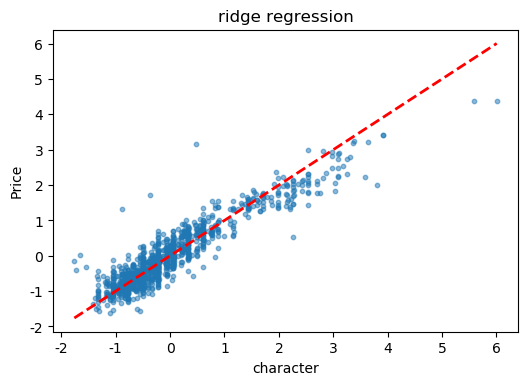

In [16]:
print("--------------Ridge Regression---------------")
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import r2_score#R square

X = char_data.drop(['Price'],axis=1)
y = char_data[['Price']]

# 划分训练集和测试集
from sklearn.model_selection import train_test_split,cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

#导入岭回归算法
from sklearn.linear_model import Ridge
rid_reg_model=Ridge(alpha=10)#确定约束参数
rid_reg_model.fit(X_train,y_train)
print(f'常数项为：{rid_reg_model.intercept_}')  # 常数项 
print(f'各项系数为：{rid_reg_model.coef_}')     # 变量系数 

#评价指标
rid_reg_r2_score_train = r2_score(y_train,rid_reg_model.predict(X_train))
rid_reg_MSE_train = metrics.mean_squared_error(y_train,rid_reg_model.predict(X_train))
rid_reg_RMSE_train = np.sqrt(metrics.mean_squared_error(y_train,rid_reg_model.predict(X_train)))
rid_reg_r2_score_test = r2_score(y_test,rid_reg_model.predict(X_test))
rid_reg_MSE_test = metrics.mean_squared_error(y_test,rid_reg_model.predict(X_test))
rid_reg_RMSE_test = np.sqrt(metrics.mean_squared_error(y_test,rid_reg_model.predict(X_test)))

print("--------------训练集评价指标-----------------")
print("R2:",rid_reg_r2_score_train)
print("MSE:",rid_reg_MSE_train)
print("RMSE:",rid_reg_RMSE_train)
print("--------------测试集评价指标-----------------")
print("R2:",rid_reg_r2_score_test)
print("MSE:",rid_reg_MSE_test)
print("RMSE:",rid_reg_RMSE_test)

# 画图描述真实值和预测值的变化关系
fig,ax = plt.subplots(figsize=(6,4), dpi=100)
ax.scatter(y_train,rid_reg_model.predict(X_train),s=10,alpha=0.5)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
ax.set_xlabel('character')
ax.set_ylabel('Price')
plt.title('ridge regression')

### Lasso回归

--------------Lasso Regression---------------
使用的特征值数量： 10
常数项为：[-0.00708431]
各项系数为：[[-0.62635288 -0.17496999  0.24386406  0.01375494  0.02363918 -0.17724722
  -0.00306034  0.26484206 -0.06614082  0.0948726  -0.06863412]]
--------------训练集评价指标-----------------
R2: 0.863319472391272
MSE: 0.13688096871575559
RMSE: 0.3699742811544548
--------------测试集评价指标-----------------
R2: 0.8836418759080145
MSE: 0.11583847161339002
RMSE: 0.3403505128736991


Text(0.5, 1.0, 'Lasso regression')

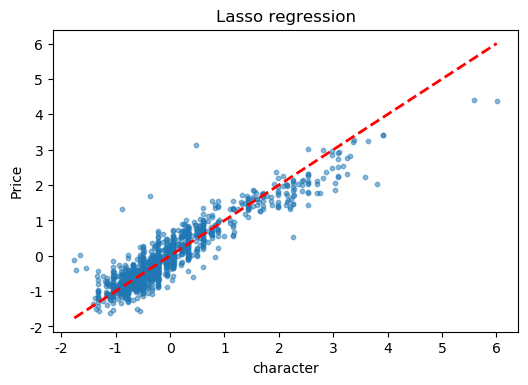

In [17]:
print("--------------Lasso Regression---------------")
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import r2_score#R square

X = char_data.drop(['Price'],axis=1)
y = char_data[['Price']]

# 划分训练集和测试集
from sklearn.model_selection import train_test_split,cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

#导入岭回归算法
from sklearn.linear_model import Lasso
# alpha的值是0.001
las_reg_model = Lasso(alpha=0.001)
las_reg_model.fit(X_train,y_train)
print("使用的特征值数量：", np.sum(las_reg_model.coef_ != 0))
print(f'常数项为：{rid_reg_model.intercept_}')  # 常数项 
print(f'各项系数为：{rid_reg_model.coef_}')     # 变量系数 

#评价指标
las_reg_r2_score_train = r2_score(y_train,las_reg_model.predict(X_train))
las_reg_MSE_train = metrics.mean_squared_error(y_train,las_reg_model.predict(X_train))
las_reg_RMSE_train = np.sqrt(metrics.mean_squared_error(y_train,las_reg_model.predict(X_train)))
las_reg_r2_score_test = r2_score(y_test,las_reg_model.predict(X_test))
las_reg_MSE_test = metrics.mean_squared_error(y_test,las_reg_model.predict(X_test))
las_reg_RMSE_test = np.sqrt(metrics.mean_squared_error(y_test,las_reg_model.predict(X_test)))

print("--------------训练集评价指标-----------------")
print("R2:",las_reg_r2_score_train)
print("MSE:",las_reg_MSE_train)
print("RMSE:",las_reg_RMSE_train)
print("--------------测试集评价指标-----------------")
print("R2:",las_reg_r2_score_test)
print("MSE:",las_reg_MSE_test)
print("RMSE:",las_reg_RMSE_test)

# 画图描述真实值和预测值的变化关系
fig,ax = plt.subplots(figsize=(6,4), dpi=100)
ax.scatter(y_train,las_reg_model.predict(X_train),s=10,alpha=0.5)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
ax.set_xlabel('character')
ax.set_ylabel('Price')
plt.title('Lasso regression')

## Step5 结论

In [18]:
#建立一个dataframe对比各模型评分
evaluation = pd.DataFrame({'Model': [],
                           'R2_score_train': [],
                           'R2_score_test': [],
                           'MSE_score_train': [],
                           'MSE_score_test': [],
                           'RMSE_score_train':[],
                           'RMSE_score_test':[],
                           })
r = evaluation.shape[0]
evaluation.loc[r] = ['Simple Linear Regression', sim_lin_reg_r2_score_train, sim_lin_reg_r2_score_test, 
                     sim_lin_reg_MSE_train, sim_lin_reg_RMSE_test, sim_lin_reg_RMSE_train, sim_lin_reg_RMSE_test]

r = evaluation.shape[0]
evaluation.loc[r] = ['Ridge Regression', rid_reg_r2_score_train, rid_reg_r2_score_test, 
                     rid_reg_MSE_train, rid_reg_RMSE_test, rid_reg_RMSE_train, rid_reg_RMSE_test]

r = evaluation.shape[0]
evaluation.loc[r] = ['Lasso Regression', las_reg_r2_score_train, las_reg_r2_score_test, 
                     las_reg_MSE_train, las_reg_RMSE_test, las_reg_RMSE_train, las_reg_RMSE_test]
evaluation

,Model,R2_score_train,R2_score_test,MSE_score_train,MSE_score_test,RMSE_score_train,RMSE_score_test
0,Simple Linear Regression,0.863389,0.883596,0.136812,0.340417,0.369881,0.340417
1,Ridge Regression,0.863231,0.883524,0.136970,0.340523,0.370095,0.340523
2,Lasso Regression,0.863319,0.883642,0.136881,0.340351,0.369974,0.340351


Text(0.5, 1.0, 'RMSE_score')

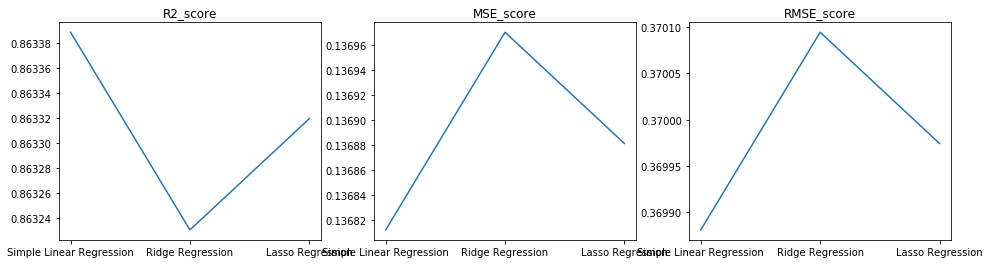

In [19]:
plt.figure(1,figsize=(16,4))
ax1 = plt.subplot(131)
ax1.plot(evaluation['Model'],evaluation['R2_score_train'])
plt.title('R2_score')
ax2 = plt.subplot(132)
ax2.plot(evaluation['Model'],evaluation['MSE_score_train'])
plt.title('MSE_score')
ax3 = plt.subplot(133)
ax3.plot(evaluation['Model'],evaluation['RMSE_score_train'])
plt.title('RMSE_score')

Text(0.5, 1.0, 'RMSE_score')

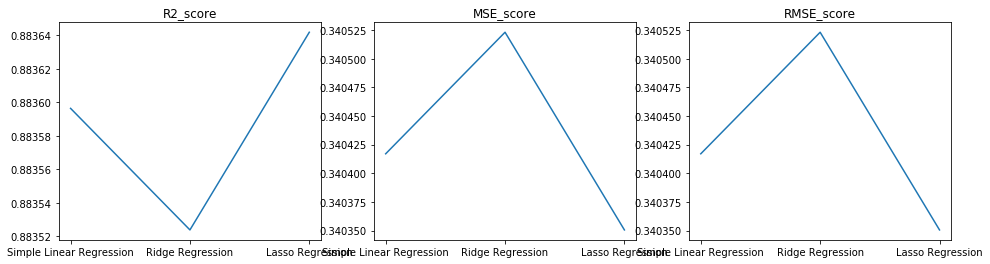

In [20]:
plt.figure(1,figsize=(16,4))
ax1 = plt.subplot(131)
ax1.plot(evaluation['Model'],evaluation['R2_score_test'])
plt.title('R2_score')
ax2 = plt.subplot(132)
ax2.plot(evaluation['Model'],evaluation['MSE_score_test'])
plt.title('MSE_score')
ax3 = plt.subplot(133)
ax3.plot(evaluation['Model'],evaluation['RMSE_score_test'])
plt.title('RMSE_score')

### 通过以上图表可得如下结论：
* 三个模型中，R2评价指标测试集得分均高于训练集得分，MSE评价指标训练集优于测试集，RMSE评价指标测试集优于训练集
* R2评价指标：简单线性回归训练集拟合程度最高，拉索回归预测结果最准确。（简单线性回归可能有一定程度的过拟合，拉索回归通过L1正则化纠正。
* MSE评价指标：简单线性回归训练集拟合程度最高，拉索回归预测结果最准确。（同上）
* RMSE评价指标：简单线性回归训练集拟合程度最高，拉索回归预测结果最准确。（同上）
#### 总结：简单线性回归可能有一定程度的过拟合，拉索回归可通过L1正则化有效纠正。

### 附：利用网格搜索（GridSearchCV）获取最优参数方法

In [21]:
#### Ridge Regression

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split,cross_val_score
X = char_data.drop(['Price'],axis=1)
y = char_data[['Price']]

# 划分训练集和测试集
from sklearn.model_selection import train_test_split,cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import Ridge
rid_reg_model=Ridge()
parameters = {'alpha':[1, 5, 10, 20, 50, 100]}#设置几个参数
gd_sr=GridSearchCV(rid_reg_model, parameters, cv=5, verbose=10)

gd_sr.fit(X_train,y_train)
best_parameters = gd_sr.best_params_
print(best_parameters)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] alpha=1 .........................................................
[CV] ............................. alpha=1, score=0.831, total=   0.0s
[CV] alpha=1 .........................................................
[CV] ............................. alpha=1, score=0.890, total=   0.0s
[CV] alpha=1 .........................................................
[CV] ............................. alpha=1, score=0.834, total=   0.0s
[CV] alpha=1 .........................................................
[CV] ............................. alpha=1, score=0.841, total=   0.0s
[CV] alpha=1 .........................................................
[CV] ............................. alpha=1, score=0.880, total=   0.0s
[CV] alpha=5 .........................................................
[CV] ............................. alpha=5, score=0.833, total=   0.0s
[CV] alpha=5 .........................................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.2s finished


In [23]:
#### Lasso Regression

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split,cross_val_score
X = char_data.drop(['Price'],axis=1)
y = char_data[['Price']]

# 划分训练集和测试集
from sklearn.model_selection import train_test_split,cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

from sklearn.linear_model import Lasso
rid_reg_model=Lasso()
parameters = {'alpha':[10, 1, 0.5, 0.1, 0.05, 0.01, 0.001]}#设置几个参数
gd_sr=GridSearchCV(rid_reg_model, parameters, cv=5, verbose=10)

gd_sr.fit(X_train,y_train)
best_parameters = gd_sr.best_params_
print(best_parameters)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] alpha=10 ........................................................
[CV] ........................... alpha=10, score=-0.003, total=   0.0s
[CV] alpha=10 ........................................................
[CV] ........................... alpha=10, score=-0.001, total=   0.0s
[CV] alpha=10 ........................................................
[CV] ........................... alpha=10, score=-0.033, total=   0.0s
[CV] alpha=10 ........................................................
[CV] ........................... alpha=10, score=-0.005, total=   0.0s
[CV] alpha=10 ........................................................
[CV] ........................... alpha=10, score=-0.005, total=   0.0s
[CV] alpha=1 .........................................................
[CV] ............................ alpha=1, score=-0.003, total=   0.0s
[CV] alpha=1 .........................................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    0.2s finished
